In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle
import chardet
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
#metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import learning_curve

## **Partie 1: Collecte et Préparation des Données**

In [3]:
df_heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df_heart.shape

(1025, 14)

In [5]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Partie 2 : Analyse Exploratoire des Données

In [6]:
#maligne
df_heart_maligne = df_heart.loc[df_heart['target'] == 1]
df_heart_maligne.shape

(526, 14)

In [7]:
#Tumeur benigne
df_heart_benigne = df_heart.loc[df_heart['target'] == 0]
df_heart_benigne.shape

(499, 14)

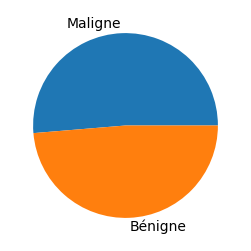

In [8]:
tr = ['Maligne', 'Bénigne']
tab = []
tab.append(df_heart_maligne.shape[0])
tab.append(df_heart_benigne.shape[0])
fig = plt.figure(figsize=(5,3))
plt.pie(tab, labels=tr)
plt.show()

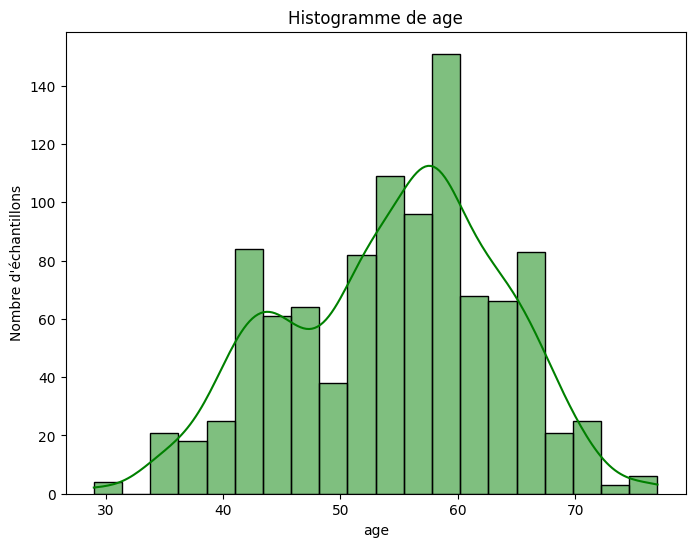

In [9]:
# Sélectionner seulement l'attribut 'age'
mean_radius = df_heart['age']

# Création d'un histogramme de l'attribut 'age'
plt.figure(figsize=(8, 6))
sns.histplot(mean_radius, bins=20, kde=True, color='green')
plt.title('Histogramme de age')
plt.xlabel('age')
plt.ylabel('Nombre d\'échantillons')
plt.show()

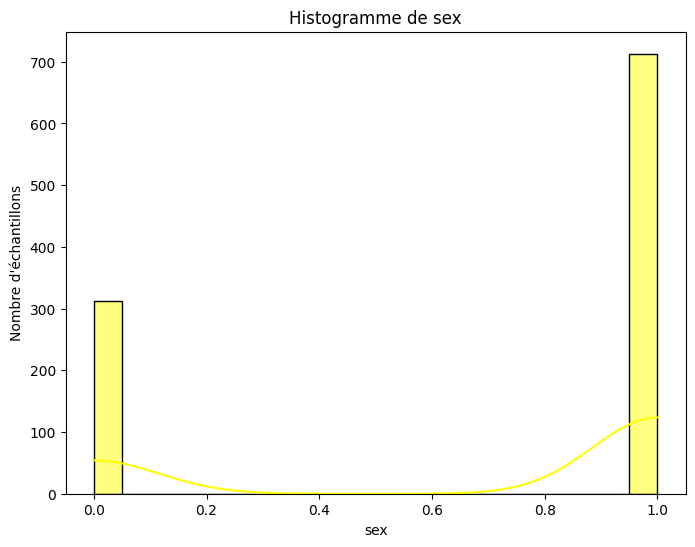

In [10]:
# Sélectionner seulement l'attribut 'sex'
sex = df_heart['sex']

# Création d'un histogramme de l'attribut 'sex'
plt.figure(figsize=(8, 6))
sns.histplot(sex, bins=20, kde=True, color='yellow')
plt.title('Histogramme de sex')
plt.xlabel('sex')
plt.ylabel('Nombre d\'échantillons')
plt.show()

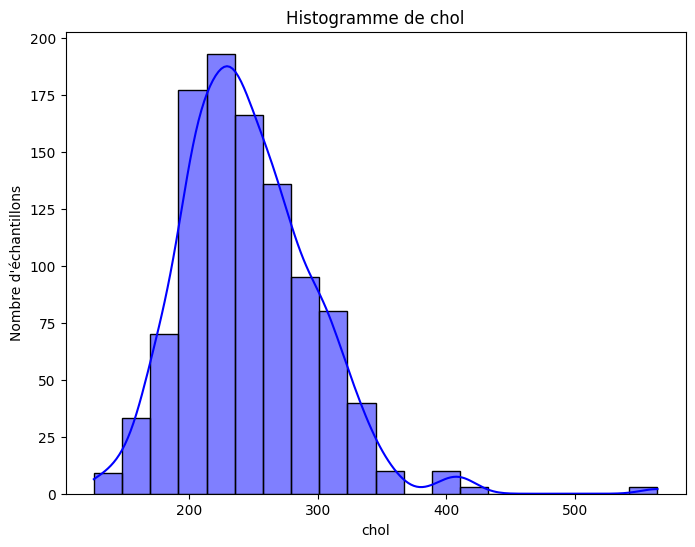

In [11]:
# Sélectionner seulement l'attribut 'chol'
chol = df_heart['chol']

# Création d'un histogramme de l'attribut 'chol'
plt.figure(figsize=(8, 6))
sns.histplot(chol, bins=20, kde=True, color='blue')
plt.title('Histogramme de chol')
plt.xlabel('chol')
plt.ylabel('Nombre d\'échantillons')
plt.show()

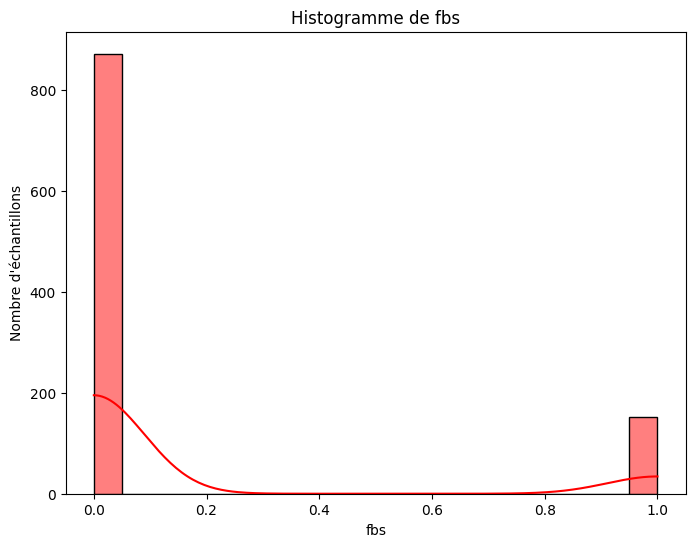

In [12]:
# Sélectionner seulement l'attribut 'fbs'
fbs = df_heart['fbs']

# Création d'un histogramme de l'attribut 'fbs'
plt.figure(figsize=(8, 6))
sns.histplot(fbs, bins=20, kde=True, color='red')
plt.title('Histogramme de fbs')
plt.xlabel('fbs')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [13]:
#Correlation entre les features
df_heart.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


##**Partie 3: Modélisation**

In [14]:
X = df_heart.drop('target', axis=1)  # X contient toutes les colonnes sauf 'target'
y = df_heart['target'] # y contient uniquement la colonne 'target'

In [15]:
# print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((717, 13), (308, 13), (717,), (308,))

### RandomForestClassifier

In [16]:
# Construction, entraînement et test de l'algorithme : Random Forest Classifier
%%time
from sklearn.ensemble import RandomForestClassifier

#Construction
rf_classifier = RandomForestClassifier()
#Entrainement
rf_classifier.fit(X_train, y_train)

CPU times: user 424 ms, sys: 20.4 ms, total: 444 ms
Wall time: 831 ms


RandomForestClassifier()

In [17]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [18]:
# Algorithme : modèle Random Forest Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
precision_score_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_score_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_score_rf = f1_score(y_test, y_pred_rf, average='macro')

print("accuracy rf = ",accuracy_score_rf)
print("precision rf = ",precision_score_rf)
print("recall rf = ",recall_score_rf)
print("f1 rf = ",f1_score_rf)

accuracy rf =  1.0
precision rf =  1.0
recall rf =  1.0
f1 rf =  1.0


In [19]:
#Etape 1 : Test
y_pred_rf = rf_classifier.predict(X_test)
#Etape 2 Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[145   0]
 [  0 163]]


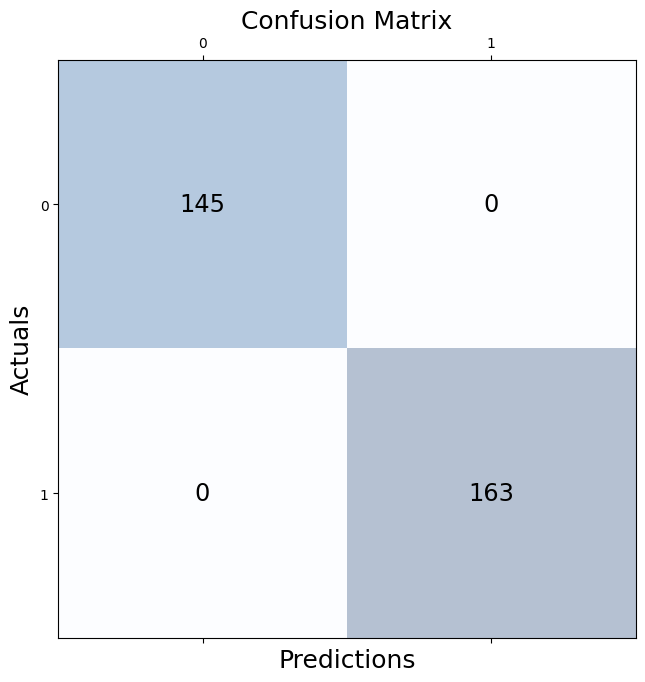

In [20]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### DNN

*Modèle 2*
* Input (Entrée)
* Couche cachée (Hidden Layer) à 128 neurones, à fonction d'activation 'RELU'
* Couche cachée (Hidden Layer) à 512 neurones, à fonction d'activation 'RELU'
* Couche cachée (Hidden Layer) à 256 neurones, à fonction d'activation 'RELU'
* Output (Sortie)

In [21]:
from keras import models
from keras import layers

model_dnn = models.Sequential()
model_dnn.add(layers.Dense(128, activation='relu', input_shape=(X.shape[1],)))
model_dnn.add(layers.Dense(512, activation='relu'))
model_dnn.add(layers.Dense(256, activation='relu'))
model_dnn.add(layers.Dense(1, activation='softmax'))


model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 199425 (779.00 KB)
Trainable params: 199425 (779.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_dnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

hist = model_dnn.fit(
  x=np.asarray(X).astype(np.float32),
  y=np.asarray(y).astype(np.float32),
  batch_size=8,
  epochs=100,
  validation_split=0.2
)

Epoch 1/100
103/103 [==============================] - 7s 24ms/step - loss: 7.6626 - accuracy: 0.5207 - val_loss: 0.6433 - val_accuracy: 0.4829
Epoch 2/100
103/103 [==============================] - 1s 13ms/step - loss: 0.6316 - accuracy: 0.5207 - val_loss: 0.6837 - val_accuracy: 0.4829
Epoch 3/100
103/103 [==============================] - 1s 10ms/step - loss: 0.5880 - accuracy: 0.5207 - val_loss: 0.5872 - val_accuracy: 0.4829
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 0.6491 - accuracy: 0.5207 - val_loss: 0.6556 - val_accuracy: 0.4829
Epoch 5/100
103/103 [==============================] - 1s 7ms/step - loss: 0.5299 - accuracy: 0.5207 - val_loss: 0.4972 - val_accuracy: 0.4829
Epoch 6/100
103/103 [==============================] - 1s 6ms/step - loss: 0.4932 - accuracy: 0.5207 - val_loss: 0.4847 - val_accuracy: 0.4829
Epoch 7/100
103/103 [==============================] - 1s 6ms/step - loss: 0.4941 - accuracy: 0.5207 - val_loss: 0.5138 - val_accuracy: 0.4

In [23]:
#sauvegarde du modèle
model_dnn.save("/content/model_dnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


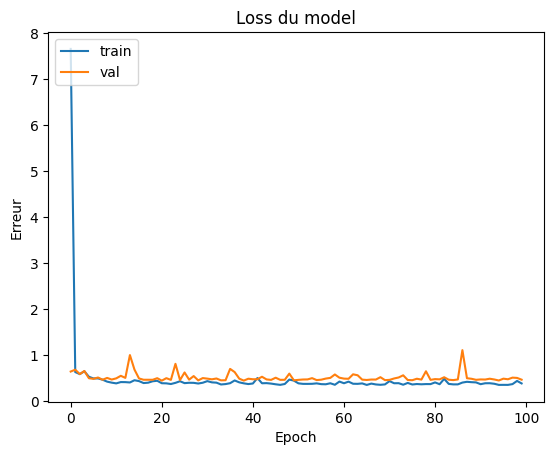

In [24]:
#Évaluation du modèle
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss du model')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# Évaluation du modèle sur les données de test
y_pred = model_dnn.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy_dnn = model_dnn.evaluate(X_test, y_test)[1]
auc_dnn  = roc_auc_score(y_test, y_pred)
f1_dnn  = f1_score(y_test, y_pred_binary)
precision_dnn  = precision_score(y_test, y_pred_binary)
recall_dnn  = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy_dnn }")
print(f"AUC: {auc_dnn }")
print(f"F1-score: {f1_dnn }")
print(f"Precision: {precision_dnn }")
print(f"Recall: {recall_dnn }")

10/10 [==============================] - 1s 11ms/step - loss: 0.3313 - accuracy: 0.5292
Accuracy: 0.5292207598686218
AUC: 0.4992384176010154
F1-score: 0.6921443736730362
Precision: 0.5292207792207793
Recall: 1.0


In [26]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[  0 145]
 [  0 163]]


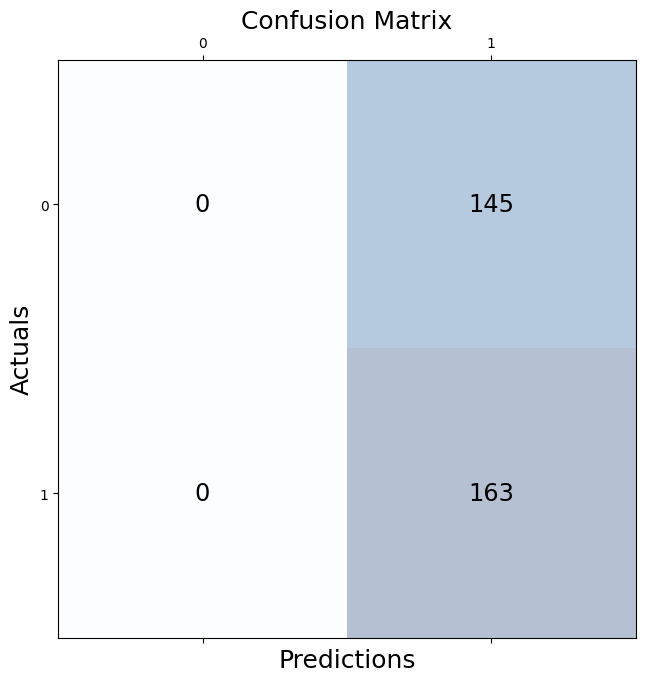

In [27]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_binary)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### xgboost Classifier

In [28]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# XGBoost
xgb = make_pipeline(StandardScaler(), XGBClassifier())

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

print('score XGB',xgb.score(X_test, y_test))



score XGB 1.0


In [29]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [30]:
# Algorithme : xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
precision_score_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_score_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_score_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("accuracy xgb = ",accuracy_score_xgb)
print("precision xgb = ",precision_score_xgb)
print("recall xgb = ",recall_score_xgb)
print("f1 xgb = ",f1_score_xgb)

accuracy xgb =  1.0
precision xgb =  1.0
recall xgb =  1.0
f1 xgb =  1.0


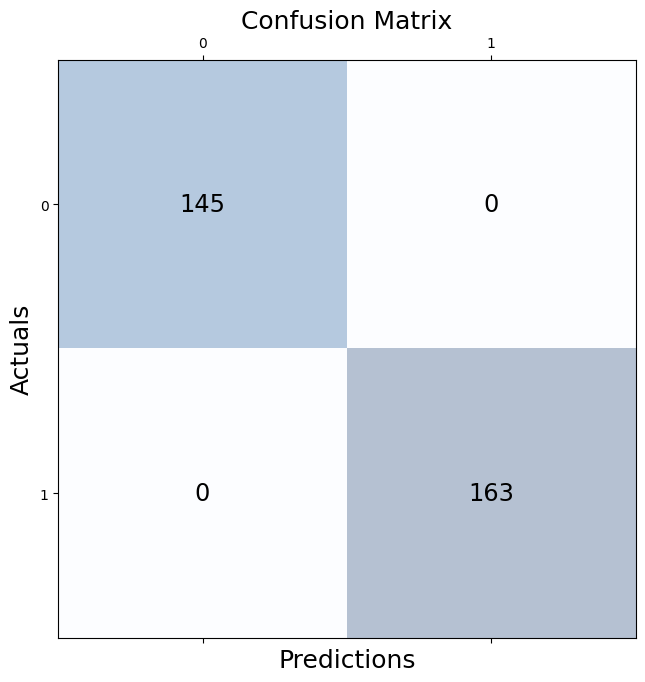

In [31]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_xgb)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Partir 4 : Interprétation des Résultats

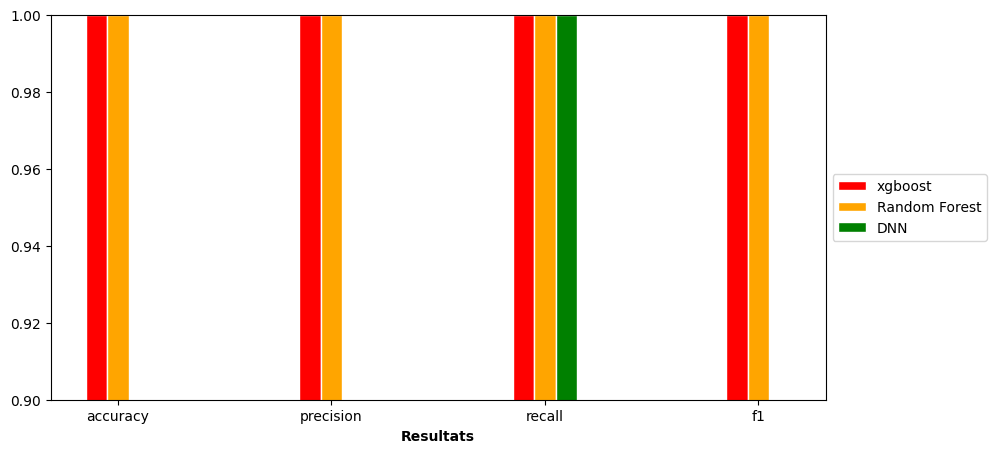

In [32]:
#Comparaison entre trois algorithmes en utilisant la bibliothèque matplotlib pour tracer "bar chart".
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.set(ylim=[0.9, 1.0])

score_algo1 = [accuracy_score_xgb, precision_score_xgb, recall_score_xgb, f1_score_xgb]
score_algo2 = [accuracy_score_rf, precision_score_rf, recall_score_rf, f1_score_rf]
score_algo3 = [accuracy_dnn , precision_dnn , recall_dnn , f1_dnn]

barWidth = 0.1  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(4)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, score_algo1, color='red', width=barWidth, edgecolor='white', label='xgboost')
plt.bar(r2, score_algo2, color='orange', width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r3, score_algo3, color='green', width=barWidth, edgecolor='white', label='DNN')

# Add xticks on the middle of the group bars
plt.xlabel('Resultats', fontweight='bold')
plt.xticks([r + barWidth for r in range(4)], ['accuracy', 'precision', 'recall', 'f1'])

# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()